In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from palettable.cubehelix import Cubehelix
import seaborn as sns
import math

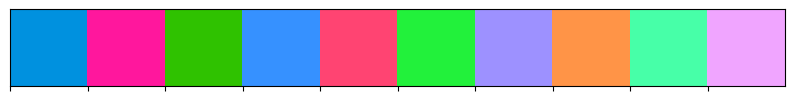

In [3]:
colors = sns.cubehelix_palette(n_colors=10, start=5, rot=8, hue=3, light=0.4, dark=.8)
sns.palplot(colors)

In [4]:
def save_fig(file_name, figure, output_dir):
    figure.patch.set_facecolor("white")
    figure.savefig(output_dir + file_name, bbox_inches="tight")

In [33]:
def create_bw_microbench_graph(input_dataframe, servers, markers, colors, packet_size_ticks):
    fig, ax = plt.subplots()

    subsets = []
    legend_labels = []

    for server in servers:
        subset = input_dataframe.loc[input_dataframe.server.eq(server)]
        subsets.append(subset)
        legend_labels.append(server)

    for i in range(0, len(subsets)):
        subsets[i].plot(x="buf_size", y="bw_gbps", logx=True, ax=ax, marker=markers[i], color=[colors[i]], label=servers[i])
    x_ticks = packet_size_ticks
    x_labels = packet_size_ticks

    ax.set_xlabel("Packet size (bytes, log scale)", fontsize=16)
    ax.set_ylabel("Goodput (Gbps)", fontsize=16)
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.yticks(fontsize=14)
    plt.draw()

    return fig, ax

# Unopt Results

In [6]:
unopt_results = pd.read_csv("unopt_results.csv")

In [7]:
unopt_results.sort_values("buf_size", inplace=True)

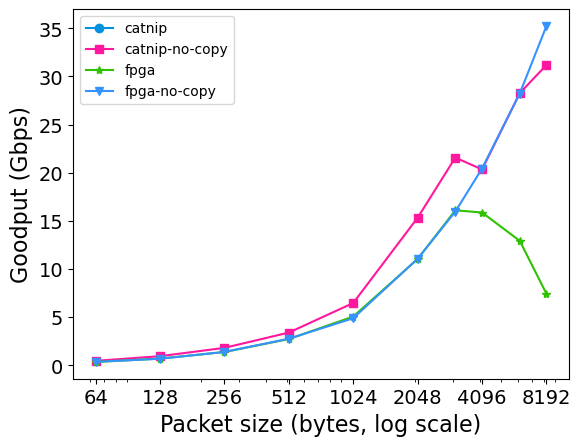

In [8]:
fig,ax = create_bw_microbench_graph(unopt_results, ["catnip", "catnip-no-copy", "fpga", "fpga-no-copy"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

In [9]:
recv_results = pd.read_csv("recv_results.csv")
recv_results.sort_values("buf_size", inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'recv_results.csv'

In [10]:
create_bw_microbench_graph(recv_results, ["fpga"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

NameError: name 'recv_results' is not defined

In [11]:
read_opt_client_send = pd.read_csv("pipe_read_send_results.csv")
read_opt_client_send.sort_values("buf_size", inplace=True)

In [12]:
read_opt_client_send["dir"] = "send"
read_opt_client_send

,buf_size,time,bytes,server,bw_gbps,dir
11,64,53.176874,3148800000,catnip-no-copy,0.473710,send
10,64,53.466790,3148800000,catnip,0.471141,send
9,64,73.453981,3211264000,fpga,0.349744,send
8,64,80.866193,3211264000,fpga-no-copy,0.317687,send
35,128,57.457197,6297600000,catnip-no-copy,0.876841,send
34,128,54.818999,6297600000,catnip,0.919039,send
33,128,74.061822,6422528000,fpga,0.693748,send
32,128,77.291344,6422528000,fpga-no-copy,0.664760,send
19,256,55.415210,12595200000,catnip-no-copy,1.818302,send
18,256,56.026225,12595200000,catnip,1.798472,send


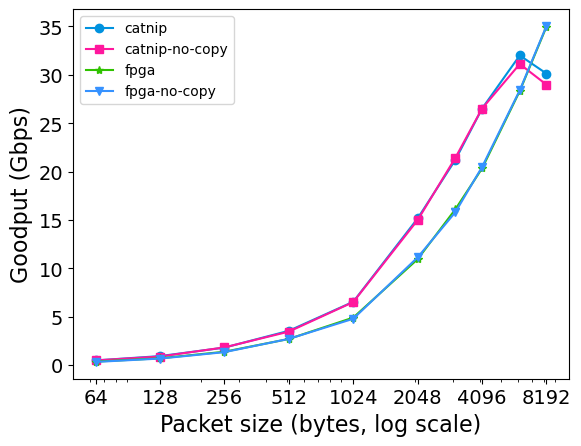

In [13]:
fig,ax = create_bw_microbench_graph(read_opt_client_send, ["catnip", "catnip-no-copy", "fpga", "fpga-no-copy"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

In [14]:
read_opt_client_recv = pd.read_csv("pipe_read_recv_results.csv")
read_opt_client_recv.sort_values("buf_size", inplace=True)
read_opt_client_recv["dir"] = "recv"
read_opt_client_recv

,buf_size,time,bytes,server,bw_gbps,dir
3,64,114.194263,3211262401,fpga,0.224968,recv
2,64,113.449557,3211260032,fpga-no-copy,0.226445,recv
1,128,109.031593,3211260290,fpga,0.235621,recv
0,128,102.918863,3211268190,fpga-no-copy,0.249616,recv
15,256,89.047542,3211256515,fpga-no-copy,0.288498,recv
16,256,96.804334,3211256994,fpga,0.265381,recv
18,512,81.417882,3211263104,fpga,0.315534,recv
14,512,63.174490,6422528091,fpga-no-copy,0.813307,recv
6,1024,16.022219,51380224080,fpga-no-copy,25.654485,recv
17,1024,65.127336,12845050312,fpga,1.577838,recv


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Packet size (bytes, log scale)', ylabel='Goodput (Gbps)'>)

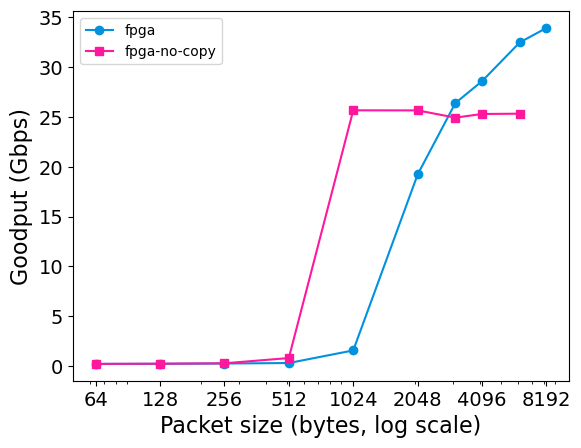

In [15]:
create_bw_microbench_graph(read_opt_client_recv, ["fpga", "fpga-no-copy"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

In [22]:
catnap_results = pd.read_csv("catnap_results.csv")
catnap_results.sort_values("buf_size", inplace=True)
catnap_results_recv = catnap_results.loc[catnap_results.client_dir.eq("recv")]
catnap_results_send = catnap_results.loc[catnap_results.client_dir.eq("send")]
catnap_results

,buf_size,time,bytes,server,bw_gbps,client_libos,client_dir,client_copy,server_copy
5,64,18.817171,3211264446,fpga,1.365249,catnap,recv,copy,copy
16,64,74.192740,3211264000,fpga,0.346262,catnap,send,copy,copy
17,64,59.483348,3211264000,catnap,0.431887,catnap,send,copy,copy
2,128,18.765009,6422534652,fpga,2.738090,catnap,recv,copy,copy
15,128,39.317095,6422528000,catnap,1.306816,catnap,send,copy,copy
14,128,70.537043,6422528000,fpga,0.728415,catnap,send,copy,copy
6,256,18.817168,12845056001,fpga,5.460994,catnap,recv,copy,copy
18,256,73.980220,12845056000,fpga,1.389026,catnap,send,copy,copy
19,256,43.755027,12845056000,catnap,2.348540,catnap,send,copy,copy
9,512,17.851427,25690111488,fpga,11.512855,catnap,recv,copy,copy


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Packet size (bytes, log scale)', ylabel='Goodput (Gbps)'>)

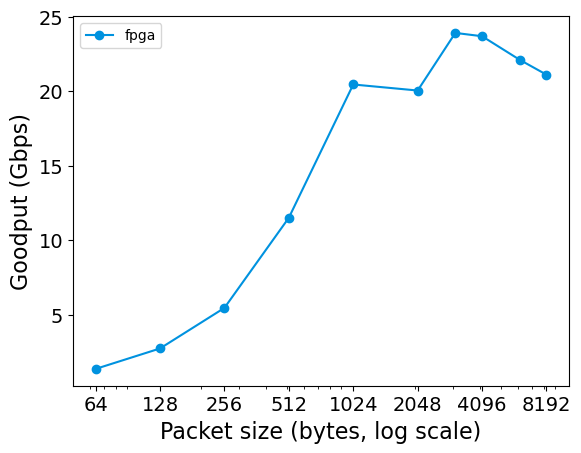

In [23]:
create_bw_microbench_graph(catnap_results_recv, ["fpga"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])

In [26]:
catnap_results_server_dir = catnap_results.copy()
catnap_results["server"] = catnap_results["server"] + "-" + catnap_results["client_dir"]

In [44]:
catnap_results["kreqs_per_sec"] = (((catnap_results["bw_gbps"] * (10**9))/8)/catnap_results["buf_size"])/1000
catnap_results

,buf_size,time,bytes,server,bw_gbps,client_libos,client_dir,client_copy,server_copy,reqs_per_sec,kreqs_per_sec
5,64,18.817171,3211264446,fpga-recv,1.365249,catnap,recv,copy,copy,2.666501e+06,2666.501063
16,64,74.192740,3211264000,fpga-send,0.346262,catnap,send,copy,copy,6.762926e+05,676.292588
17,64,59.483348,3211264000,catnap-send,0.431887,catnap,send,copy,copy,8.435302e+05,843.530196
2,128,18.765009,6422534652,fpga-recv,2.738090,catnap,recv,copy,copy,2.673916e+06,2673.915715
15,128,39.317095,6422528000,catnap-send,1.306816,catnap,send,copy,copy,1.276188e+06,1276.187882
14,128,70.537043,6422528000,fpga-send,0.728415,catnap,send,copy,copy,7.113425e+05,711.342550
6,256,18.817168,12845056001,fpga-recv,5.460994,catnap,recv,copy,copy,2.666501e+06,2666.501183
18,256,73.980220,12845056000,fpga-send,1.389026,catnap,send,copy,copy,6.782353e+05,678.235345
19,256,43.755027,12845056000,catnap-send,2.348540,catnap,send,copy,copy,1.146748e+06,1146.748234
9,512,17.851427,25690111488,fpga-recv,11.512855,catnap,recv,copy,copy,2.810756e+06,2810.755668


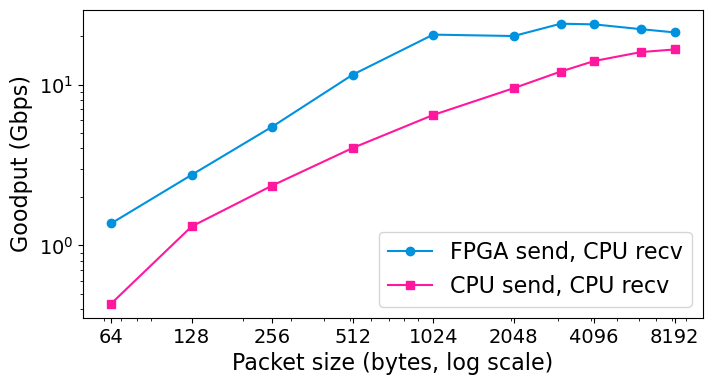

In [40]:
fig, ax = create_bw_microbench_graph(catnap_results, ["fpga-recv", "catnap-send"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.legend(["FPGA send, CPU recv", "CPU send, CPU recv"], fontsize=16)
fig.set_size_inches(8, 4)
save_fig("catnap_tcp_cmp.pdf", fig, "./")

In [42]:
catnap_pivot = catnap_results.pivot(index="buf_size", values="reqs_per_sec", columns="server")
catnap_pivot

server,catnap-send,fpga-recv,fpga-send
buf_size,,,
64,8.435302e+05,2.666501e+06,676292.587626
128,1.276188e+06,2.673916e+06,711342.549807
256,1.146748e+06,2.666501e+06,678235.345427
512,9.831005e+05,2.810756e+06,695270.663637
1024,7.891450e+05,2.497913e+06,688277.465422
2048,5.794311e+05,1.224201e+06,622210.592362
3072,4.904360e+05,9.735006e+05,518230.333912
4096,4.277732e+05,7.233495e+05,335089.263189
6144,3.243651e+05,4.499984e+05,296665.048401


In [43]:
catnap_pivot["fpga-recv"]/catnap_pivot["catnap-send"]

buf_size
64      3.161121
128     2.095237
256     2.325272
512     2.859073
1024    3.165340
2048    2.112764
3072    1.984970
4096    1.690965
6144    1.387321
8192    1.277047
dtype: float64

In [ ]:
fpga_only_send = read_opt_client_send.loc[read_opt_client_send.server.eq("fpga")]
fpga_only_recv = read_opt_client_recv.loc[read_opt_client_recv.server.eq("fpga")]
fpga_only = pd.concat([fpga_only_send, fpga_only_recv])
fpga_only["server"] = fpga_only["server"] + "-" + fpga_only["dir"]
fpga_only

In [44]:
catnip_only = read_opt_client_send.loc[read_opt_client_send.server.eq("catnip")]
catnip_only

,buf_size,time,bytes,server,bw_gbps,dir
10,64,53.466790,3148800000,catnip,0.471141,send
34,128,54.818999,6297600000,catnip,0.919039,send
18,256,56.026225,12595200000,catnip,1.798472,send
14,512,57.036090,25190400000,catnip,3.533258,send
26,1024,61.686961,50380800000,catnip,6.533737,send
22,2048,53.191296,100761600000,catnip,15.154600,send
30,3072,57.013915,151142400000,catnip,21.207791,send
38,4096,60.810893,201523200000,catnip,26.511461,send
2,6144,36.241545,144998400000,catnip,32.007113,send
6,8192,51.333229,193331200000,catnip,30.129599,send


In [46]:
final_df = pd.concat([catnip_only, fpga_only])
final_df

,buf_size,time,bytes,server,bw_gbps,dir
10,64,53.466790,3148800000,catnip,0.471141,send
34,128,54.818999,6297600000,catnip,0.919039,send
18,256,56.026225,12595200000,catnip,1.798472,send
14,512,57.036090,25190400000,catnip,3.533258,send
26,1024,61.686961,50380800000,catnip,6.533737,send
22,2048,53.191296,100761600000,catnip,15.154600,send
30,3072,57.013915,151142400000,catnip,21.207791,send
38,4096,60.810893,201523200000,catnip,26.511461,send
2,6144,36.241545,144998400000,catnip,32.007113,send
6,8192,51.333229,193331200000,catnip,30.129599,send


Text(0.5, 1.0, 'TCP goodput vs packet size, single connection')

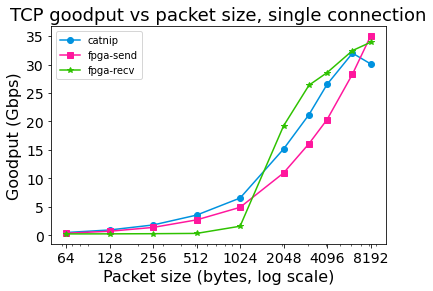

In [54]:
fig,ax = create_bw_microbench_graph(final_df, ["catnip", "fpga-send", "fpga-recv"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
ax.set_title("TCP goodput vs packet size, single connection", fontsize=18)

# Demikernel 1.4 benchmarks

In [15]:
posix_tcp = pd.read_csv("bw_tcp_posix.csv")
posix_tcp["time_s"] = posix_tcp["time_us"] * (10 ** -6)
posix_tcp.drop("time_us", axis=1, inplace=True)
posix_tcp

,platform,payload_size,bytes,time_s
0,posix,64,2621440000,15.560210
1,posix,128,5242880000,15.698708
2,posix,256,10485760000,16.321134
3,posix,512,20971520000,18.701525
4,posix,1024,41943040000,25.981003
5,posix,2048,83886080000,32.751775
6,posix,3072,62914560000,20.128202
7,posix,4096,83886077080,24.346371
8,posix,6144,62914560000,16.319534
9,posix,8192,83886080000,20.554788


In [25]:
catnap_tcp = pd.read_csv("bw_tcp_catnap.csv")
catnap_tcp.rename(columns={"bytes_sent": "bytes"}, inplace=True)
catnap_tcp

,platform,payload_size,bytes,time_s
0,catnap,64,393213504,8.021241
1,catnap,128,786431616,7.695168
2,catnap,256,572867584,7.737231
3,catnap,512,3145726464,7.951461
4,catnap,1024,6291457024,8.501886
5,catnap,2048,12582912000,13.700595
6,catnap,3072,18874368000,20.325143
7,catnap,4096,25165824000,27.363986
8,catnap,6144,37748736000,40.834783
9,catnap,8192,50331648000,53.925168


In [31]:
final_tcp = pd.concat([posix_tcp, catnap_tcp])
final_tcp.rename(columns={"platform": "server"}, inplace=True)
final_tcp.rename(columns={"payload_size": "buf_size"}, inplace=True)
final_tcp["bw_gbps"] = ((final_tcp["bytes"] * 8)/final_tcp["time_s"]) * (10 ** -9)
final_tcp

,server,buf_size,bytes,time_s,bw_gbps
0,posix,64,2621440000,15.560210,1.347766
1,posix,128,5242880000,15.698708,2.671751
2,posix,256,10485760000,16.321134,5.139721
3,posix,512,20971520000,18.701525,8.971042
4,posix,1024,41943040000,25.981003,12.914987
5,posix,2048,83886080000,32.751775,20.490146
6,posix,3072,62914560000,20.128202,25.005536
7,posix,4096,83886077080,24.346371,27.564215
8,posix,6144,62914560000,16.319534,30.841351
9,posix,8192,83886080000,20.554788,32.648775


Text(0.5, 1.0, 'TCP')

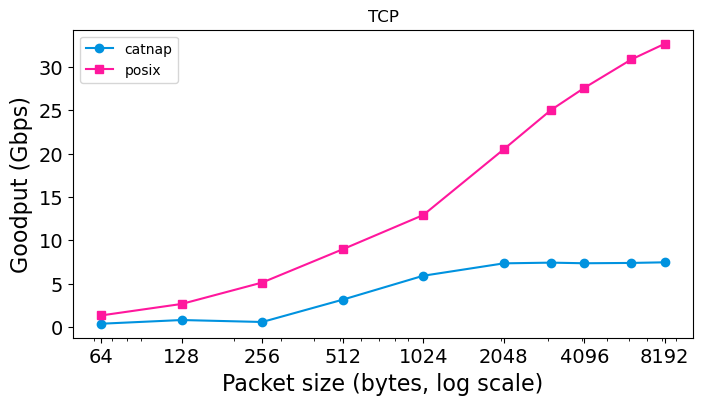

In [37]:
fig,ax = create_bw_microbench_graph(final_tcp, ["catnap", "posix"], ["o", "s", "*", "v"], colors, [64, 128, 256, 512, 1024, 2048, 4096, 8192])
fig.set_size_inches(8, 4)
save_fig("catnap_posix_tcp_cmp_demi1.4.png", fig, "./")
ax.set_title("TCP")